# Matplotlib

## Introduction

Matplotlib is a 2D and 3D graphics library for generating scientific figures. Some of the advantages of this library include:

* Easy to get started - resembles IDL or MATLAB-stle procedure interface
* Support for LaTeX formatted labels and texts
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF
* Great control of every element in a figure, including figure size and DPI
* GUI for interactively exploring figures but supports figure generation without the GUI
* Integrates well with Jupyter notebooks

More information at the Matplotlib web page: http://matplotlib.org/

Other resources: 

* This talk is based on a notebook by J.R. Johannson: http://jrjohansson.github.io/
* http://matplotlib.org/gallery.html - A large gallery showcaseing types of plots matplotlib can create. 
* https://github.com/WeatherGod/AnatomyOfMatplotlib : anatomy of matplotlib tutorial
* http://stackoverflow.com/ : Usually the first thing that comes up when you google "how do I fix this plot".  Or if it doesn't, just ask there!

## Getting started

To get started using Matplotlib in a Python notebook or program, you need to import matplotlib.  More specifically, here we will be importing the "pyplot" interface to matplotlib.  That's will be most familiar to MATLAB or IDL users, but there is an object-oriented interface as well (more on that below).

(of course you also need to have matplotlib installed... but it comes with Anaconda so you should be all set already!)

In [71]:
import matplotlib
import matplotlib.pyplot as plt # the "plt" name is not required but is used in almost all examples

# you could do this if you don't want to keep typing "plt.", but it's *BAD* practice.  
# It makes for harder-to-read code and you might overwrite something in your namespace without realizing it
#from matplotlib.pylab import * 

# we'll need numpy to generate arrays and such
import numpy as np

This line is a "magic" command (that's the official name from the Jupyter team!) that configures Jupyter and matplotlib to show figures embedded in the notebook, instead of opening a new window for each figure.  It's unique to Jupyter/IPython, though, so any "magic" commands will cause a Python *script* to fail.

In [72]:
%matplotlib inline

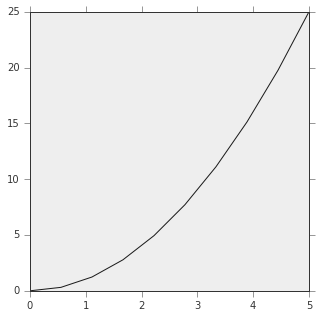

In [73]:
x = np.linspace(0, 5, 10)
y = x**2

plt.figure(figsize=(5,5))
plt.plot(x, y)

#in a Python session this will not pop open the plot
#need to do the following:
#plt.show(block=False)

In [74]:
# this will pop up a window in the notebook showing you what the "plot" function accepts
plt.plot?

## Colors, line widths, line styles

With the `plot` function, we can define the colors of lines and other graphical elements in a number of convenient ways:`'b'` means blue, `'g'` means green, `'b.-'` means a blue line with dots.

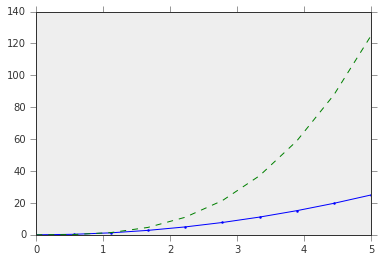

In [75]:
plt.plot(x, x**2, 'b.-') # blue line with dots
plt.plot(x, x**3, 'g--') # green dashed line

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the color and alpha keyword arguments. For selecting good color combinations, try the following:

- http://colorbrewer2.org/
- http://paletton.com
- http://coolors.co/

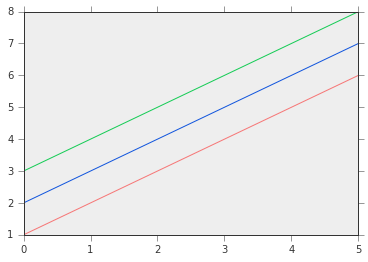

In [76]:
plt.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
plt.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
plt.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

Below you see a wide range of other options you can make with lines

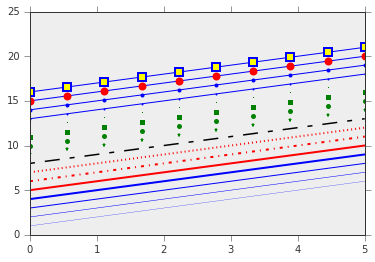

In [77]:
plt.plot(x, x+1, color="blue", linewidth=0.25)
plt.plot(x, x+2, c="blue", linewidth=0.50)
plt.plot(x, x+3, c="blue", linewidth=1.00)
plt.plot(x, x+4, c="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
plt.plot(x, x+5, c="red", lw=2, linestyle='-')
plt.plot(x, x+6, c="red", lw=2, ls='-.')
plt.plot(x, x+7, c="red", lw=2, ls=':')

# custom dash
line, = plt.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
plt.plot(x, x+ 9, c="green", ls='none', marker='*')
plt.plot(x, x+10, c="green", ls='none', marker='o')
plt.plot(x, x+11, c="green", ls='none', marker='s')
plt.plot(x, x+12, c="green", ls='none', marker=',')

# marker size and color
plt.plot(x, x+13, c="blue", lw=1, ls='-', marker='o', markersize=2)
plt.plot(x, x+14, c="blue", lw=1, ls='-', marker='o', markersize=4)
plt.plot(x, x+15, c="blue", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.plot(x, x+16, c="blue", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

# Titles, labels, legends, text

Now let's look at how decorate a figure with titles, axis labels, and legends.

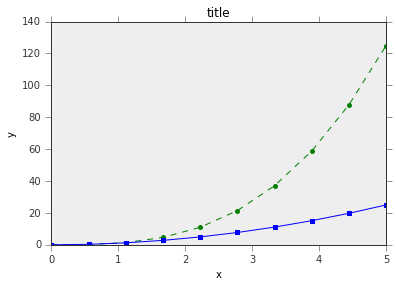

In [78]:
plt.plot(x, x**3, 'g--',marker='o')
plt.plot(x, x**2, 'b-',marker='s')
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')

## Legend 

You can define all the elements of the legend by hand, but a more robust way is to use the label='label text' keyword argument when nex objects are added to the figure. The advantage is that if the figure changes, the legend will be automatically updated. 

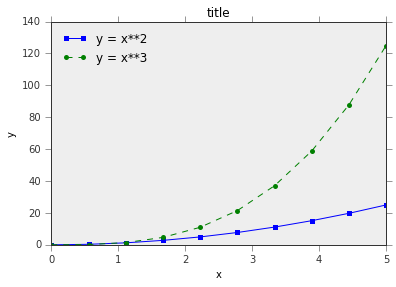

In [79]:
plt.plot(x, x**2, 'b-',marker='s', label="y = x**2")
plt.plot(x, x**3,'g--',marker='o', label="y = x**3")
plt.xlabel('x')
plt.ylabel('y')
plt.title('title')
plt.legend(loc='upper left', frameon=False) # upper left corner
#plt.legend(loc=0) # let matplotlib decide the optimal location
#plt.legend(loc=1) # upper right corner
#plt.legend(loc=2) # upper left corner
#plt.legend(loc=3) # lower left corner
#plt.legend(loc=4) # lower right corner
# .. many more options are available, as you'll see from the pop-up window - try them out!
plt.legend?

# Formatting Text

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, ``"$y=x^3$"``.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example \alpha to produce the symbol α. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an 'r', like r"\alpha" or r'\alpha' instead of "\alpha" or '\alpha':

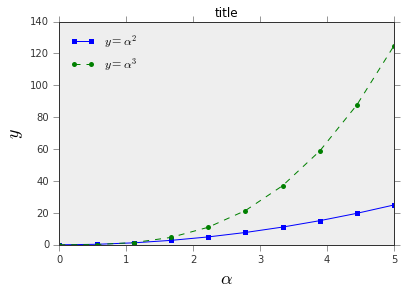

In [80]:
fig, ax = plt.subplots()

plt.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
plt.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
plt.legend(loc=2, frameon=False) # upper left corner
plt.xlabel(r'$\alpha$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18)
plt.title('title')

#  Global `rcparams` state (and fonts)

We can also change the global font size and font family, which applies to all text elements in a figure (tick labels, axis labels and titles, legends, etc.). 

This uses the "rcParams" machinery, which matplotlib uses to control all of its style defaults. You could also do this by modifying the `$HOME/.matplotlib/matplotlibrc` file, and some online tutorials or posts may recommend you do this.  But you shouldn't. It's almost always a bad idea when you're doing science: it means to reproduce plots you need to be on the same computer with the same `matplotlibrc` file, and that leads to tremendous frustrations when sharing with collaborators or just changing to a new computer!

You may want to play around with style defaults at the top of a notebook or script, though, using the technique you see below. One thing the `matplotlibrc` file *is* good for is showing you all the options you can change.

In [81]:
#save the state from *before* you change anything
old_rcparams = dict(matplotlib.rcParams)  # this makes a *copy*

In [82]:
# Update the matplotlib configuration parameters
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['font.family'] = 'serif'

# Another font option (and another way to update the rcParams)
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

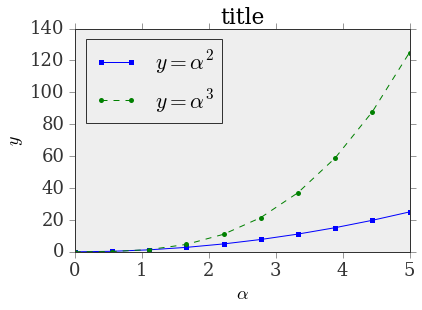

In [83]:
plt.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
plt.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
plt.legend(loc=2) # upper left corner
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$y$')
plt.title('title')

In [84]:
# And this restore the default from before
matplotlib.rcParams.update(old_rcparams)
#matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans', 'text.usetex': False})

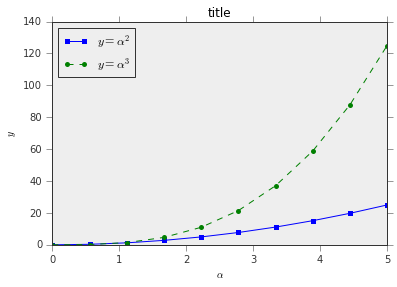

In [85]:
plt.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
plt.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")
plt.legend(loc=2) # upper left corner
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$y$')
plt.title('title')

# Text Annotations 

Annotating text in matplotlib figures can be done using the `text()` function. It supports LaTeX formatting just like axis label texts and titles:

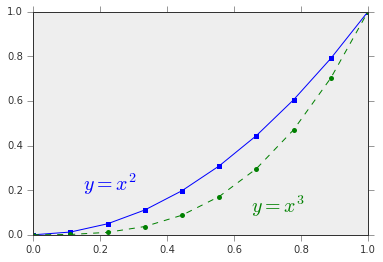

In [86]:
xx = np.linspace(0., 1., 10)

plt.plot(xx, xx**2, 'b-',marker='s', label=r"$y = \alpha^2$")
plt.plot(xx, xx**3, 'g--',marker='o', label=r"$y = \alpha^3$")

plt.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
plt.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

Note that there is a separate `annotate()` function which is subtly different because it lets you add arrows, and is meant for having text that is *offset* from where it's supposed to be pointed.  You almost always want to use `text()`, though, because it's easier to control.

# Saving a Figure 

To save a figure to a file we can use the `savefig` function. Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with pdflatex can include PDFs using the includegraphics command). In some cases, PGF can also be good alternative.

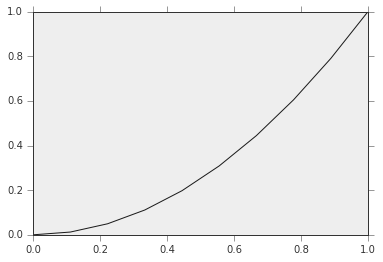

In [87]:
xx = np.linspace(0., 1., 10)

plt.plot(xx, xx**2)

plt.savefig("filename.png")
plt.savefig("filename.png", dpi=200)
plt.savefig("filename.pdf")

## Exercise 1 

Plot a sine wave with a dashed line and square points. Add a legend in the lower left corner, title and axis labels.

In [88]:
x = np.linspace(0.,10.,100.)
y = np.sin(x)

# An interlude: the Object-Oriented interface 

Up to this point we've been using the `pyplot` interface for everything.  This is the easiest approach for those used to procedure-style programming like IDL or MATLAB.  But there is another way to use matplotlib, which is in some ways easier: the object-oriented approach.  

The key idea is that instead of issuing plotting commands like ``plt.<whatever>``, which change a *global* state, instead you create individual `Figure` and `Axes` objects, and plot into them:

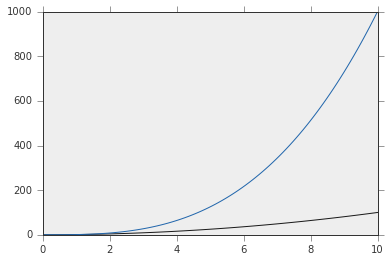

In [89]:
fig, ax = plt.subplots()

ax.plot(x, x**2)
ax.plot(x, x**3)

In the object-oriented interface, many of the commands to set properties on the axes use `ax.set_<something>` methods.  In this cell you can also see that if you put the `Figure` object as the *last* line of a cell, Jupyter will render that figure, even 

In [90]:
ax.set_title('An OO-built plot!')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
# note that you *don't* see the figure when you run this

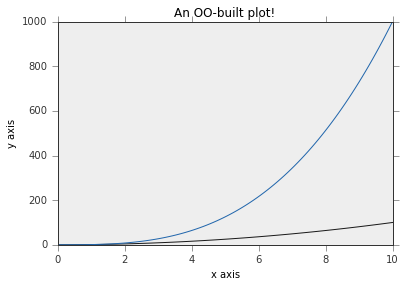

In [91]:
# but you *do* when `fig` is at the bottom
fig

When you see a ``ax.set_<something>`` it usually means there's a `ax.<something>` attribute you can use to modify that property in a more object-oriented manner:

In [92]:
ax.title

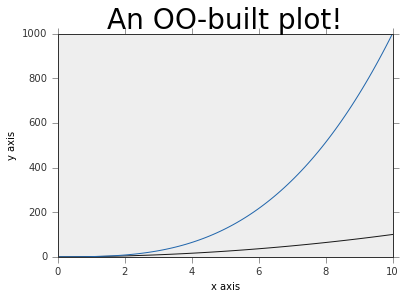

In [93]:
ax.title.set_fontsize(28)

fig

Also note that some of the properties you might want to modify are on the `Figure` not the `Axes`... but it all works the same way!

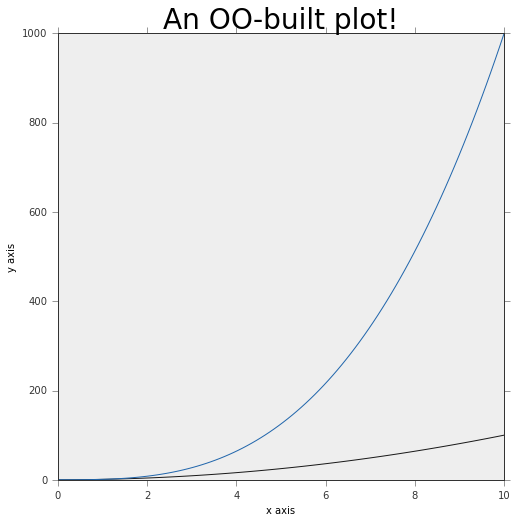

In [94]:
fig.set_figheight(8)
fig.set_figwidth(8)

fig

# Axes-related stuff 

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

## Plot Range 

First things first, let's see various ways to configure the axes range.  

Along the way, we'll see a conveninet way of working with the OO interface using short functions.

(2, 5)

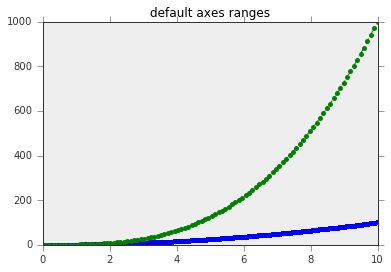

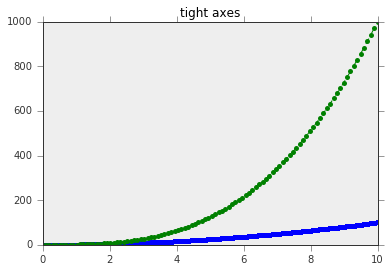

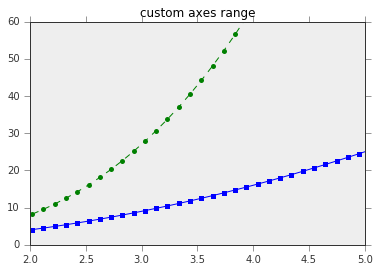

In [95]:
# since we're making three plots with the same content, we can write a function to do the "guts" of the plotting
def do_plotting(ax):
    ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
    ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")

fig1, ax1 = plt.subplots()
do_plotting(ax1)
ax1.set_title("default axes ranges")


fig2, ax2 = plt.subplots()
do_plotting(ax2)
ax2.axis('tight')
ax2.set_title("tight axes")


fig3, ax3 = plt.subplots()
do_plotting(ax3)
ax3.set_title("custom axes range");
ax3.set_ylim([0, 60])
ax3.set_xlim([2, 5])


** Logarithmic scale **

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using set_xscale and set_yscale methods which accept one parameter (with the value "log" in this case):


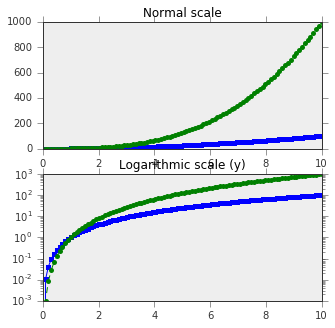

In [96]:
def do_plotting_log(ax):
    ax.plot(x, x**2, 'b-',marker='s', label=r"$y = \alpha^2$")
    ax.plot(x, x**3, 'g--',marker='o', label=r"$y = \alpha^3$")

fig, (ax1 ,ax2) = plt.subplots(2, figsize=(5,5))
      
do_plotting_log(ax1)
ax1.set_title("Normal scale")


do_plotting_log(ax2)
ax2.set_yscale("log")
ax2.set_title("Logarithmic scale (y)");

## Placement of ticks and custom tick labels 

We can explicitly determine where we want the axis ticks with 
`set_xticks` and `set_yticks`, which both take a list of values for 
where on the axis the ticks are to be placed. We can also use the 
`set_xticklabels` and `set_yticklabels` methods to provide a list of 
custom text labels for each tick location:

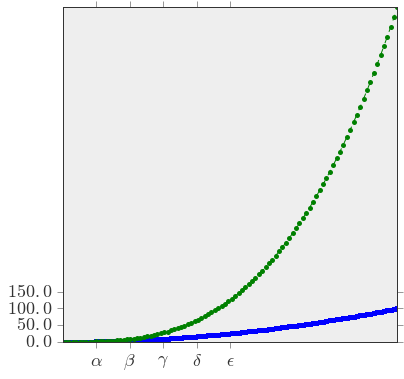

In [97]:
fig, ax = plt.subplots(figsize=(6,6))

do_plotting_log(ax)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details

## Scientific notation

With large numbers on axes, it is often better use scientific notation:

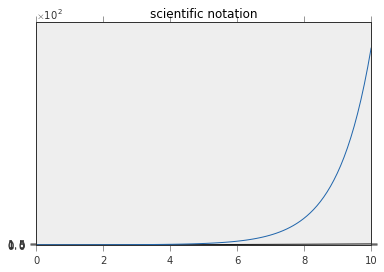

In [98]:
fig, ax = plt.subplots()
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("scientific notation")

ax.set_yticks([0, 50, 100, 150])

from matplotlib import ticker

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 

You also have control over the distance of the labels from the axis:

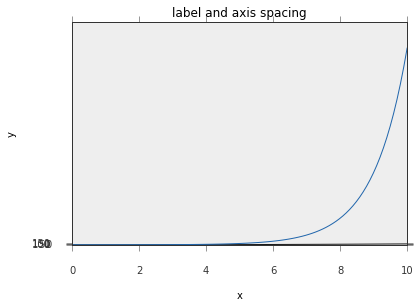

In [99]:
# distance between x and y axis and the numbers on the axes
matplotlib.rcParams['xtick.major.pad'] = 15
matplotlib.rcParams['ytick.major.pad'] = 15

fig, ax = plt.subplots()
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("label and axis spacing")

# padding between axis label and axis numbers
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15

ax.set_xlabel("x")
ax.set_ylabel("y")

Or even the direction the ticks face:

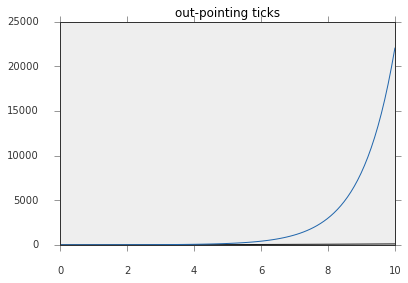

In [100]:
# you could set the defaults like this:
#matplotlib.rcParams['xtick.direction'] = 'out'
#matplotlib.rcParams['ytick.direction'] = 'out'

# or the below will do the same thing for just those axes

fig, ax = plt.subplots()

ax.tick_params(direction='out')
      
ax.plot(x, x**2, x, np.exp(x))
ax.set_title("out-pointing ticks")

In [101]:
# To restore defaults, you could do it explicitly:
#rcParams['xtick.major.pad'] = 3
#rcParams['ytick.major.pad'] = 3

# Or just use the saved state from above!
matplotlib.rcParams.update(old_rcparams)

##   Axis grid

With the grid method in the axis object, we can turn on and off grid lines. Neat, but don't overdo it. We can also customize the appearance of the grid lines using the same keyword arguments as the plot function:


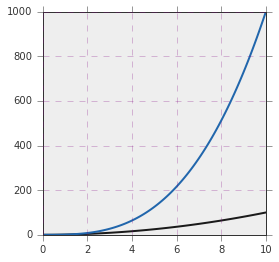

In [102]:
fig, ax = plt.subplots(figsize=(4,4))

# custom grid appearance
ax.plot(x, x**2, x, x**3, lw=2)
ax.grid(color='purple', alpha=0.5, linestyle='dashed', linewidth=0.5)

## Axis spines 

We can also change the properties of axis spines:

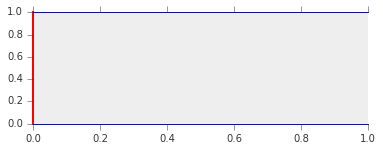

In [103]:
fig, ax = plt.subplots(figsize=(6,2))

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('blue')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)

# turn off axis spine to the right
ax.spines['right'].set_color("none")
ax.yaxis.tick_left() # only ticks on the left side

##  Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the twinx and twiny functions:


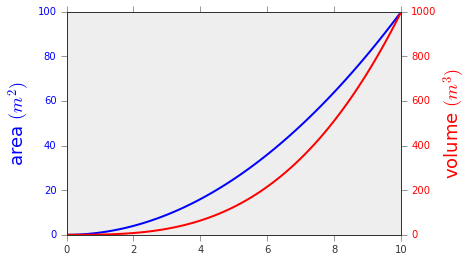

In [104]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

This also provides a subtle example of why the OO-interface is sometimes easier.  With the pylab interface you might think to do this:

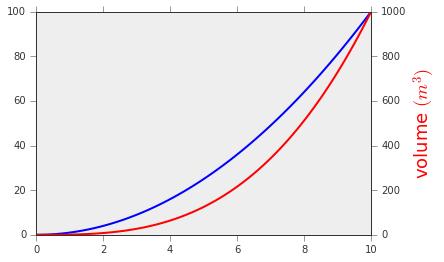

In [105]:
plt.plot(x, x**2, lw=2, color="blue")
plt.twinx()

# This is WRONG!
plt.ylabel(r"area $(m^2)$", fontsize=18, color="blue")

plt.plot(x, x**3, lw=2, color="red")
plt.ylabel(r"volume $(m^3)$", fontsize=18, color="red")

But as you can see, by creating the second axes, you've changed the "current" axes.  This is an example of one of the guiding principals from the "Zen of Python": *explicit is better than implicit*! (if you want to see the whole thing, run ``import this``)

## Exercise 2:

Take the sine plot from above.

Adjust the axes so that they are reversed and you can see the full curve. Add a grid with dotted lines. 

# `tight_layout` 

You may sometimes find that matplotlib figures have either too much or not enough white space, particularly when there are unusual layouts in a plot.  This is because, when a part of a plot is created, it doesn't always know what *else* you're going to add.  So matplotlib has an often-magic "cure-all" for this is the `tight_layout` command, which re-calculates the sizes of some components to try to fit everything:

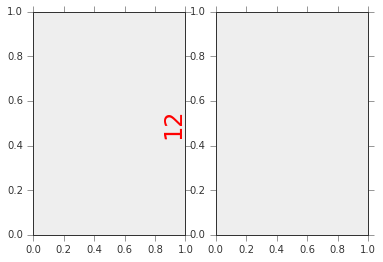

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_ylabel(12, color='red', fontsize=24)

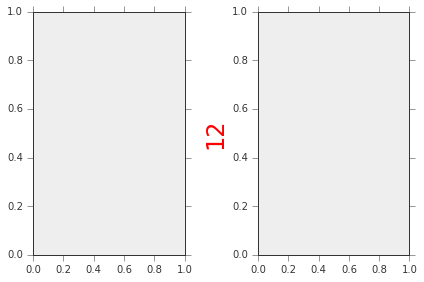

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax2.set_ylabel(12, color='red', fontsize=24)

fig.tight_layout()

## Subplots

In matplotlib, "subplots" refers to multiple axes within one figure.

There are lots of ways to make subplots. Pick one that works for you and use it. For grid-like layouts, there's a set of sub-figure layout manager, in order of increasing complexity and flexibility: `subplots()`, `subplot2grid()`, or `gridspec()`:

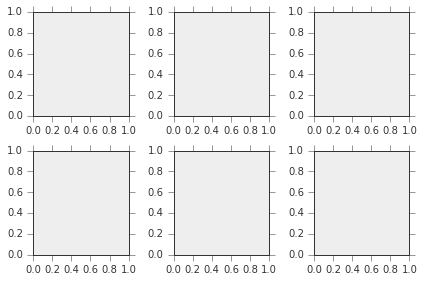

In [108]:
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

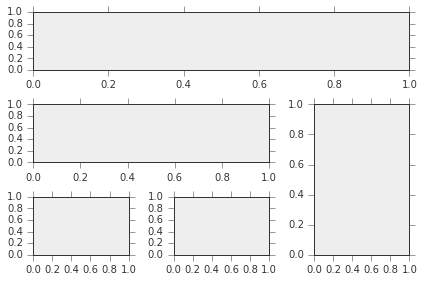

In [109]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

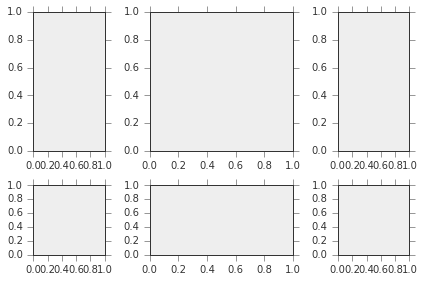

In [110]:
import matplotlib.gridspec as gridspec

fig = plt.figure()

gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)
    
fig.tight_layout()

For complete control (but at the cost of potentially more confusion...), `Axes` can be added to a matplotlib `Figure` canvas manually using `fig.add_axes()`:

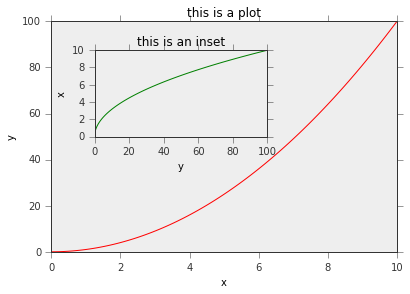

In [111]:
fig = plt.figure()

ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
ax1.plot(x, x**2, 'r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('this is a plot')

# insert
ax2.plot(x**2, x, 'g')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_title('this is an inset')
ax2.tick_params(direction='out')

# Scatter plots

In addition to the regular `plot()` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. 

One of the more useful ones is the `scatter()` plot, just for points:

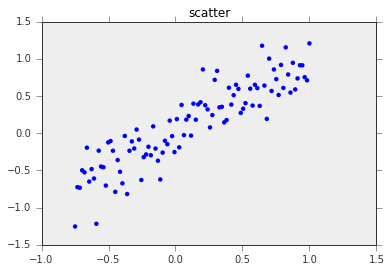

In [112]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
yy = xx + 0.25 * np.random.randn(len(xx))
ax.scatter(xx, yy)
ax.set_title("scatter")

One of its most useful features beyond `plot()` is that it allows convenient coloring and sizing of a set of points based on an input array:

/Users/imomcheva/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


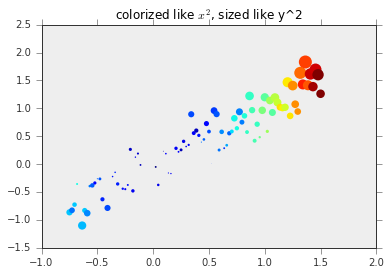

In [113]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1.5, 100)
yy = xx + 0.25 * np.random.randn(len(xx))

zz = xx**2  + 0.1 * np.random.randn(len(xx))
ww = yy**2  + 0.1 * np.random.randn(len(xx))

ax.scatter(xx, yy, c=zz, s=ww*50)
ax.set_title("colorized like $x^2$, sized like y^2")

Like most of the other color-mapped plotting functions, you can make a color bar for scatter, and choose any of a wide range of colormaps:

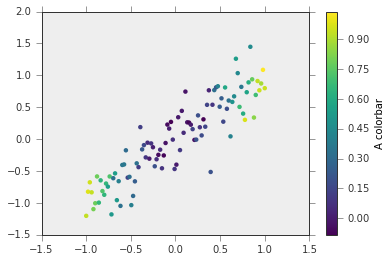

In [114]:
fig, ax = plt.subplots()

xx = np.linspace(-1, 1, 100)
yy = xx + 0.25 * np.random.randn(len(xx))
zz = xx**2  + 0.1 * np.random.randn(len(xx))

sc = ax.scatter(xx, yy, c=zz, cmap='viridis')
fig.colorbar(sc).set_label('A colorbar')

One other useful feature of `scatter()` is its ability to do alpha-blending.  If you have lots of overlapping points, this makes it much easier to see the density of points.  The `alpha` keyword controls this - it's basically the amount of transparency of any given point:

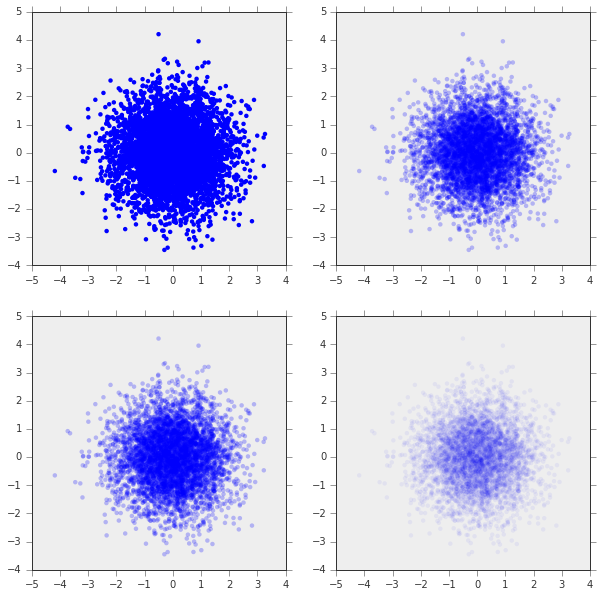

In [115]:
xx = np.random.randn(5000)
yy = np.random.randn(5000)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.scatter(xx, yy, alpha=1)
ax2.scatter(xx, yy, alpha=.25)

#lw = 0 removes the black "border" line on the markers, which confuses matters when points are blended
ax3.scatter(xx, yy, alpha=.25, lw=0)
ax4.scatter(xx, yy, alpha=.05, lw=0)

# Errror bars 

Matplotlib also provides an easy way to make plots with error bars, using the `errorbar()` function. This, again, is called like `plot()`, but accepts arrays of y or x error data. 

*Important common "gotcha": the calling order is ``(xvalue, yvalue, yunc, xunc)`` , *not* ``(xvalue, yvalue, xunc, yunc)``.*

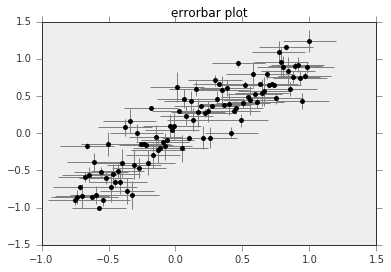

In [116]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
yy = xx + 0.25*np.random.randn(len(xx))
sigma_y = np.random.uniform(0,0.2, len(xx))
ax.errorbar(xx, yy, yerr=sigma_y, xerr=0.2, 
         fmt='o', markerfacecolor="k", 
         markersize=5, ecolor="grey", capsize=3)
ax.set_title("errorbar plot")

Sometimes you want to combine a scatter and error bar plot in one, because `errorbar()` only supports `plot` features and not `scatter`.  In that case it's convenient to remove the default points that errorbar creates (with ``fmt=None``).

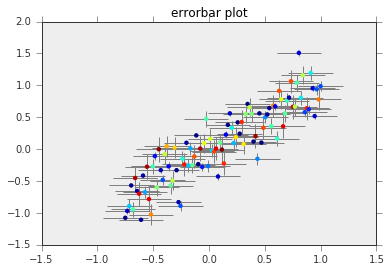

In [117]:
fig, ax = plt.subplots()

xx = np.linspace(-0.75, 1., 100)
yy = xx + 0.25*np.random.randn(len(xx))
sigma_y = np.random.uniform(0,0.2, len(xx))
ax.errorbar(xx, yy, yerr=sigma_y, xerr=0.2, fmt='none',
            ecolor="grey", capsize=0)

# the zorder=2 keyword makes sure the points are *above* the error bars instead of underneath
plt.scatter(xx, yy, c=np.hypot(sigma_y, 0.2), lw=0, zorder=2)

ax.set_title("errorbar plot")

# Histograms

Making histograms is done with  `hist()`, and is used much like `plot()`  but instead accepts a single array:

(array([   8.,   18.,  100.,  223.,  288.,  220.,  111.,   27.,    4.,    1.]),
 array([-12.23803966,  -9.33770507,  -6.43737049,  -3.53703591,
         -0.63670132,   2.26363326,   5.16396784,   8.06430243,
         10.96463701,  13.86497159,  16.76530618]),
 <a list of 10 Patch objects>)

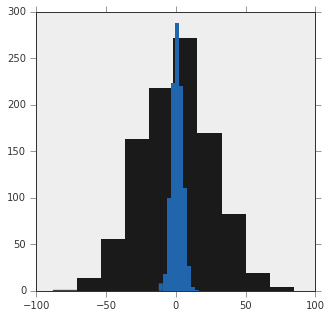

In [118]:
fig, ax = plt.subplots(figsize=(5,5))
data1 = np.random.normal(1., 25., 1000)
data2 = np.random.normal(1., 4., 1000)
ax.hist(data1)
ax.hist(data2)

The default style is fairly ugly, though, so you'll want to play around to suit your needs:

(array([   3.,    5.,    8.,   11.,   18.,   23.,   31.,   40.,   47.,
          57.,   64.,   76.,   84.,   86.,   89.,   92.,   93.,   96.,
          96.,   98.,   99.,   99.,   99.,   99.,  100.]),
 array([ -6.79363264,  -5.9219444 ,  -5.05025615,  -4.17856791,
         -3.30687966,  -2.43519141,  -1.56350317,  -0.69181492,
          0.17987333,   1.05156157,   1.92324982,   2.79493806,
          3.66662631,   4.53831456,   5.4100028 ,   6.28169105,
          7.15337929,   8.02506754,   8.89675579,   9.76844403,
         10.64013228,  11.51182052,  12.38350877,  13.25519702,
         14.12688526,  14.99857351]),
 <a list of 1 Patch objects>)

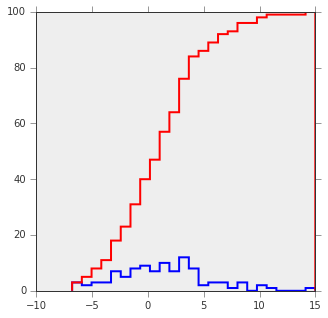

In [119]:
fig, ax = plt.subplots(figsize=(5,5))

data = np.random.normal(1., 4., 100)
ax.hist(data, bins=25, histtype="step", color="blue", linewidth=2)
ax.hist(data, bins=25, histtype="step", cumulative=True, color="red", linewidth=2)

You can also directly specify specific bins as an array (although not that those are bin *edges*, not centers):

[-5, -2, 1, 4, 7, 10]

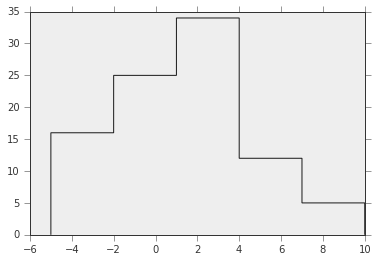

In [120]:
bins = [-5, -2, 1, 4, 7, 10]
plt.hist(data, bins=bins, histtype='step')
bins  # this is length 6, but there are 5 bins *shown*

## Displaying Images

Matplotlib can also be used to visualize image data, using the `imshow()` function. Let's open the M51 FITS file from the Pyfits demo:

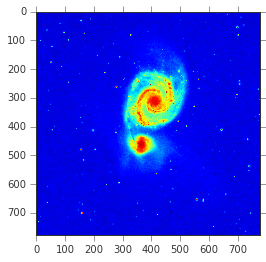

In [121]:
from astropy.io import fits

hdulist = fits.open("M51.fits")
image_data = hdulist[0].data

plt.imshow(image_data)

Well, that kind of looks like a galaxy...To make it look a bit nicer, let's change the pixel interpolation scheme, change the colormap, and make it a bit larger. For a full list of color maps, look here:
http://matplotlib.org/examples/color/colormaps_reference.html

(Also relevant, why jet is a bad colormap: https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)

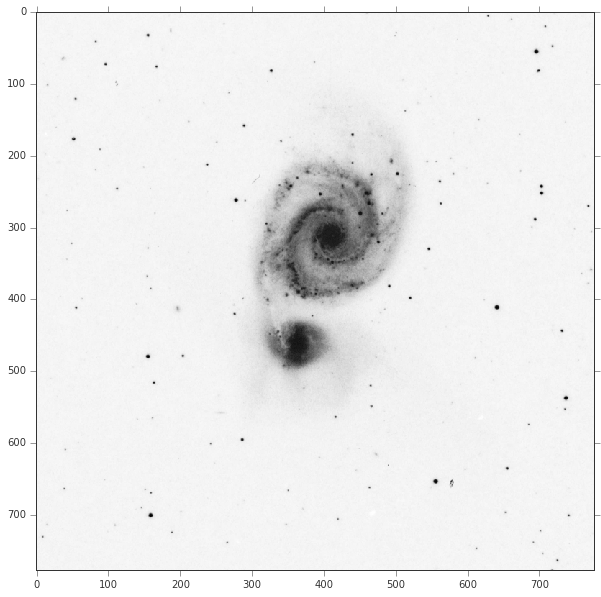

In [122]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image_data, interpolation="nearest", cmap='Greys')

That's almost there -- now let's scale the data using a square-root function, and reverse the colormap (`Greys` -> `Greys_r`)

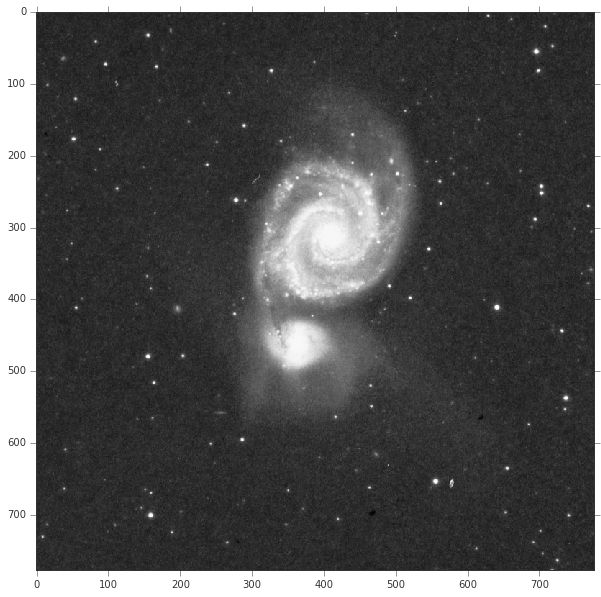

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(np.sqrt(image_data), interpolation="nearest", cmap='Greys_r')

Astropy provides lots of stretch-related tools as part of its `visualization` subpackage For more on that see:
http://docs.astropy.org/en/stable/visualization/normalization.html

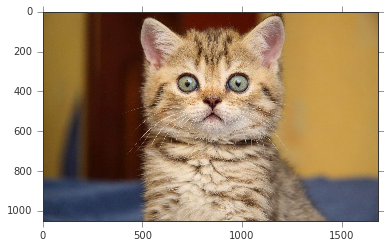

In [124]:
import matplotlib.image as mpimg
img = mpimg.imread('kitten.png')
plt.imshow(img)
#imgplot = plt.imshow(img[:,:,2])
#imgplot.set_cmap('hot')

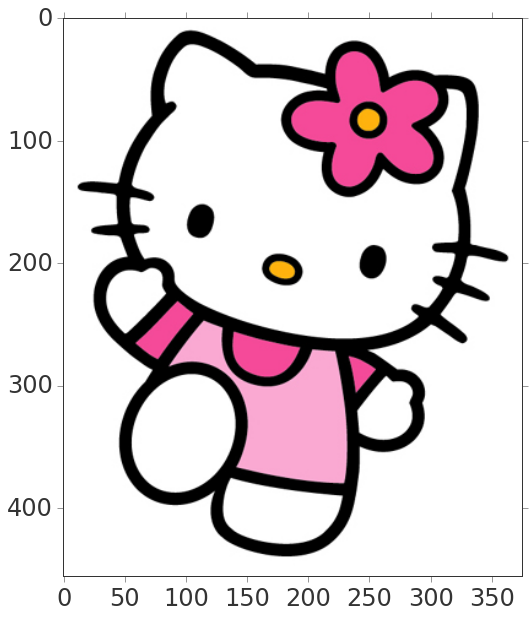

In [132]:
import urllib, io

URL = 'http://img1.wikia.nocookie.net/__cb20110622210623/thesanrio/images/d/d4/Hello_Kitty!.png'
file = io.BytesIO(urllib.request.urlopen(URL).read())

img = mpimg.imread(file)
plt.imshow(img)

## 3D Plots

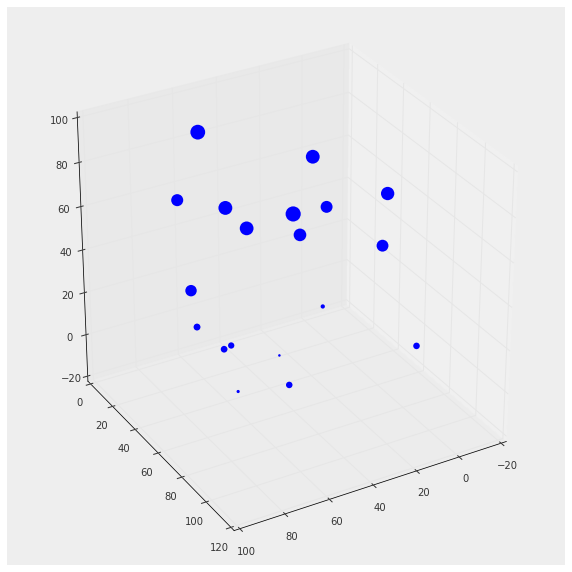

In [126]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(10.0,10.0))
ax = fig.add_subplot(111, projection='3d')
ax.pbaspect = [1.0, 1.0, 1.0]

xx = np.random.uniform(0,100, 20)
yy = np.random.uniform(0,100, 20)
zz = np.random.uniform(0,100, 20)

ax.scatter3D(xx,yy,zz, marker=".", s=zz*10, c='blue', alpha=1., edgecolors='blue', facecolors='blue', lw=0, rasterized=False)
ax.azim = 60.
ax.elev = 30.

Note that you can make movies using these 3D plots.  For an example, see http://nbviewer.jupyter.org/github/eteq/piscdwarfs_hst/blob/master/Calibrated%20Context%203D.ipynb#Make-the-3D-animated-version

## All-sky projections

Often in astronomy we want to plot spherical coordinates, like RA and Dec, and show object positions on the sky. We can do that by specifying a projection when making the plot with one extra line of code:

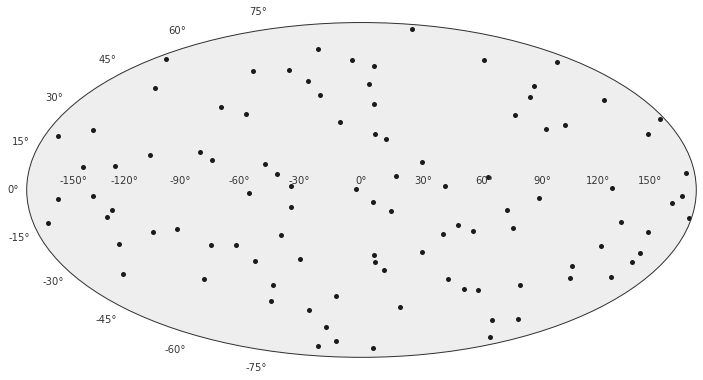

In [127]:
ra = np.random.uniform(-np.pi, np.pi, 100)
dec = np.arccos(np.random.uniform(-1., 1., 100)) - np.pi/2.

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection="hammer")
ax.plot(ra, dec, marker="o", linestyle="none")

**One caveat is that even though matplotlib displays the coordinates in *degrees*, the plot function for a spherical projection expects angles in *radians*!** Also, the bounds of the longitudinal angle (in this case, RA) have to be (-180,180) or (-$\pi$,$\pi$).

Projections accepted are:

 * Aitoff
 * Hammer
 * Mollweide
 * Lambert

Note that astropy provides some conveniences for working with angles that you can use to deal with the radians problem:

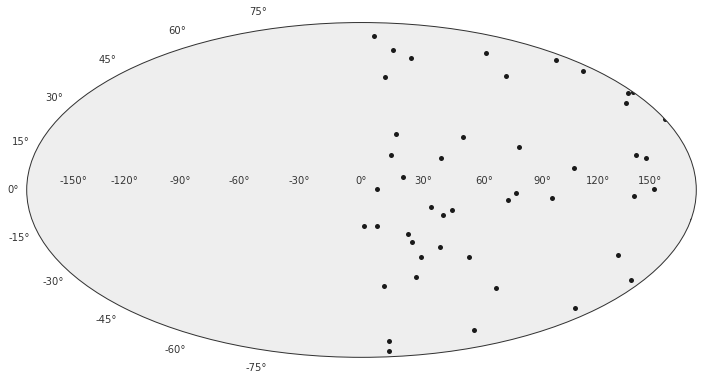

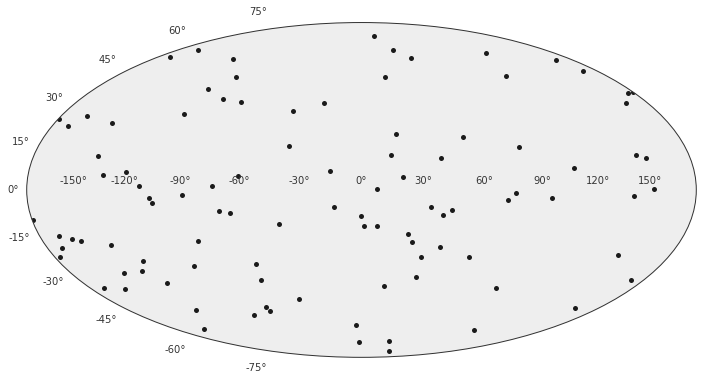

In [128]:
from astropy.coordinates import Angle
from astropy import units as u

raindeg = np.random.uniform(0, 360, 100)

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection="hammer")
ax.plot(np.radians(raindeg), dec, marker="o", linestyle="none")


astropy_angle = Angle(raindeg, 'deg')

fig = plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection="hammer")
ax.plot(astropy_angle.wrap_at(180*u.deg).radian, dec, marker="o", linestyle="none")

## Customizing Your Plots

When you draw a plot, matplotlib will check the following places (in order) to figure out how to style the plot:

1. the style parameters in the function you call (e.g., `plot(x, y, linestyle='none')`)
2. a dictionary called `rcParams` (you can tweak global plot settings by setting styles in there)
3. a file named `matplotlibrc` located in your home directory: `~/.matplotlib/matplotlibrc`
4. the hard-coded defaults that come with matplotlib

If at any of these steps, the object doesn't exist, it jumps to the next one. Most matplotlib installs don't come with a `matplotlibrc` file, for instance, so if you fire up a `plot(x,y)` command with no style arguments, it jumps directly down to the hard-coded defaults built in to matplotlib. Included in this repository (under `misc/`) is a matplotlibrc file. 

1. Copy that file to `~/.matplotlib/matplotlibrc`
2. In the iPython notebook, click Kernel -> Restart
3. Re-run the first plotting cell at the top of this notebook
4. ??
5. Profit!

The new version of matplotlib also offers a **context manager**. Let's see a demo of how this would work, and why you might find it useful. Let's say I have a Python script to make the figures in a paper I'm writing. I want to make sure that the font size, figure size, etc. is the same for all of the figures, so I can set those parameters at the top of the file using the `rcParams` dictionary:

In [129]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,10)
rcParams['font.size'] = 24
# etc.

But now let's say I have several subplots, or several plot commands that I want to have the same style. I could copy and paste the style arguments:

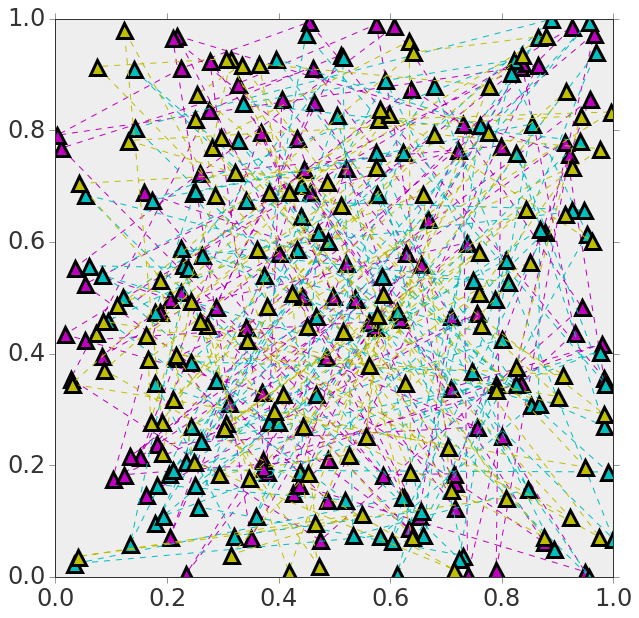

In [130]:
plt.plot(np.random.random(100), np.random.random(100), color='m', linestyle='--',
     marker='^', markeredgecolor='k', markeredgewidth=3, markersize=15)
plt.plot(np.random.random(100), np.random.random(100), color='c', linestyle='--',
     marker='^', markeredgecolor='k', markeredgewidth=3, markersize=15)
plt.plot(np.random.random(100), np.random.random(100), color='y', linestyle='--',
     marker='^', markeredgecolor='k', markeredgewidth=3, markersize=15)

Alternatively, I could use the **context manager** to set the common parameters for all plots within an indented block. In this case, `my_rc_params` are only applied to plot statements in the indented block under the `with` statement:

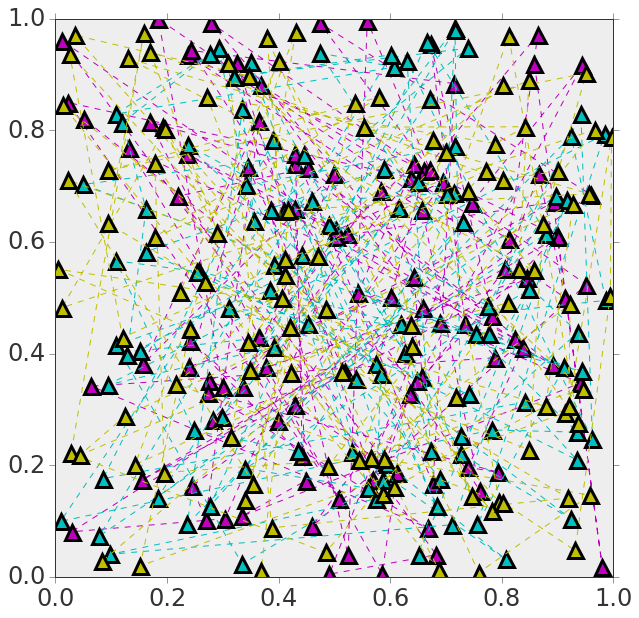

In [131]:
from matplotlib import rc_context

# To see all available keys:
# rcParams.keys()

my_rc_params = {'lines.marker' : '^',
                'lines.markeredgewidth' : 3,
                'lines.markersize' : 15,
                'lines.linestyle' : '--'}

with rc_context(my_rc_params):
    plt.plot(np.random.random(100), np.random.random(100), color='m')
    plt.plot(np.random.random(100), np.random.random(100), color='c')
    plt.plot(np.random.random(100), np.random.random(100), color='y')